In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparing Two Groups

The examples above investigate whether a sample appears to be chosen randomly from an underlying population. A similar line of reasoning can be used to determine whether two parts of a population are different. In particular, given two groups that differ in some distinguishing characteristic, we can investigate whether they are the same or different in another aspect.

### Example: Married Couples and Umarried Partners

The methods that we have developed allow us to think inferentially about data from a variety of sources. Our next example is based on a study conducted in 2010 under the auspices of the National Center for Family and Marriage Research. 

In the United States, the proportion of couples who live together but are not married has been rising in recent decades. The study involved a national random sample of over 1,000 heterosexual couples who were either married or living together but unmarried. One of the goals of the study was to compare the attitudes and experiences of the married and umarried couples. 

The table below shows a subset of the data collected in the study. Each row corresponds to one person. The variables that we will examine in this section are:

- mar_status: 1=married, 2=unmarried
- empl_status: employment status; categories described below
- gender: 1=male, 2=female
- age: Age in years


In [2]:
columns = ['mar_status', 'empl_status', 'gender', 'age', ]
couples = Table.read_table('married_couples.csv').select(columns)
couples

mar_status,empl_status,gender,age
1,1,1,51
1,1,2,53
1,1,1,57
1,1,2,57
1,1,1,60
1,1,2,57
1,2,1,62
1,1,2,59
1,7,1,53
1,5,2,61


We can improve the legibility of this table by converting numeric codes to text labels. The first two columns consist of the numerical codes assigned by the study to each person's marital status and employment status. 

The `describe` function uses `np.choose`, a function that takes a sequences of indices and a sequence of labels. It returns a list that is the same length as the sequence of indices, but contains the label (from the sequence of labels) corresponding to each instance. It's useful for converting numeric codes into text.

In [3]:
def describe(column, descriptions):
    """Relabel a column of codes and add a column of descriptions"""
    code = column + '_code'
    couples.relabel(column, code)
    couples[column] = np.choose(couples[code]-1, descriptions)
    
describe('mar_status', ['married', 'partner'])
describe('empl_status', [
    'Working as paid employee',
    'Working, self-employed',
    'Not working - on a temporary layoff from a job',
    'Not working - looking for work',
    'Not working - retired',
    'Not working - disabled',
    'Not working - other',
])
describe('gender', ['male', 'female'])
couples['count'] = 1
couples

mar_status_code,empl_status_code,gender_code,age,mar_status,empl_status,gender,count
1,1,1,51,married,Working as paid employee,male,1
1,1,2,53,married,Working as paid employee,female,1
1,1,1,57,married,Working as paid employee,male,1
1,1,2,57,married,Working as paid employee,female,1
1,1,1,60,married,Working as paid employee,male,1
1,1,2,57,married,Working as paid employee,female,1
1,2,1,62,married,"Working, self-employed",male,1
1,1,2,59,married,Working as paid employee,female,1
1,7,1,53,married,Not working - other,male,1
1,5,2,61,married,Not working - retired,female,1


Above, the first four columns are unchanged except for their labels. The next three columns interpret the codes for marital status, employment status, and gender. The final column is always 1, indicating that each row corresponds to 1 person.

Let us consider just the males first. There are 742 married couples and 292 unmarried couples, and all couples in this study had one male and one female, making 1,034 males in all. 

In [4]:
# Separate tables for married and cohabiting unmarried couples

married = couples.where('gender', 'male').where('mar_status', 'married')
partner = couples.where('gender', 'male').where('mar_status', 'partner')

In [5]:
married.num_rows

742

In [6]:
partner.num_rows

292

Societal norms have changed over the decades, and there has been a gradual acceptance of couples living together without being married. Thus it is natural to expect that unmarried couples will in general consist of younger people than married couples. The histograms of the ages of the married and unmarried men show that this is indeed the case:

(0, 0.045)

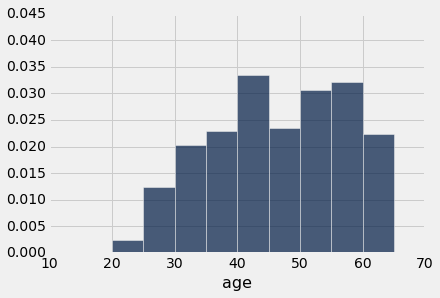

In [7]:
# Ages of married men

married.select('age').hist(bins=np.arange(15,70,5), normed=True)
plots.ylim(0, 0.045) # Set the lower and upper bounds of the vertical axis

(0, 0.045)

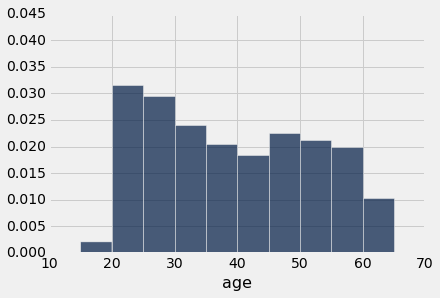

In [8]:
# Ages of cohabiting unmarried men

partner.select('age').hist(bins=np.arange(15,70,5), normed=True)
plots.ylim(0, 0.045)

The difference is even more marked when we compare the married and unmarried women. The `plots.ylim` call ensures that all four histograms have been drawn to the same scale, for ease of comparison.

In [9]:
married = couples.where('gender', 'female').where('mar_status', 'married')
partner = couples.where('gender', 'female').where('mar_status', 'partner')

(0, 0.045)

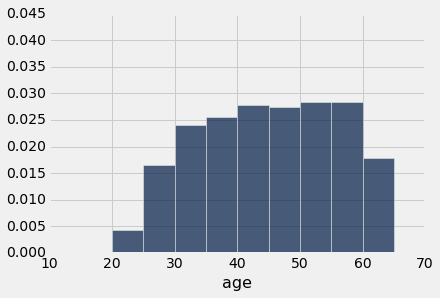

In [10]:
# Ages of married women

married.select('age').hist(bins=np.arange(15,70,5), normed=True)
plots.ylim(0, 0.045)

(0, 0.045)

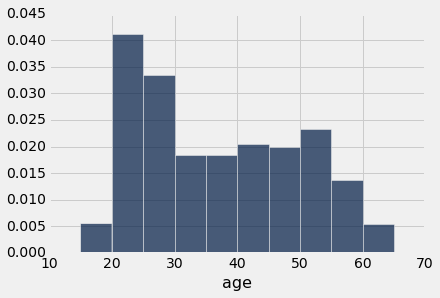

In [11]:
# Ages of cohabiting unmarried women

partner.select('age').hist(bins=np.arange(15,70,5), normed=True)
plots.ylim(0, 0.045)

If married couples are in general older, they might differ from unmarried couples in other ways as well. For example, they might tend to be more wealthy or more educated than unmarried couples. Since both of those variables are associated with employment, the next variable that we will examine will be the employment status of the men.

In [12]:
males = couples.where('gender', 'male').select(['mar_status', 'empl_status', 'count'])
males

mar_status,empl_status,count
married,Working as paid employee,1
married,Working as paid employee,1
married,Working as paid employee,1
married,"Working, self-employed",1
married,Not working - other,1
married,Not working - on a temporary layoff from a job,1
married,Not working - disabled,1
married,Working as paid employee,1
married,Working as paid employee,1
married,Not working - retired,1


### Contingency Tables

The ``pivot`` method operates on a table in which each row is classified according to two variables (marital status and employment status, in this example). It returns what is known as a *contingency table* of the counts. A contingency table consists of a cell for each pair of categories that can be formed by taking one category of the first variable and one category of the second. In the cell it displays the count of rows that match that pair of categories.

For example, the table below shows that there were 28 men who were married and not working but looking for work. There were 171 men who were not married and were working as paid employees. And so on.

The `pivot` method takes as its first argument the name of the column that contains values to be used as column labels. Each unique value in this input column appears as a column in the contingency table.  The second argument is the name of the column that contains values to be used as row labels. Each unique value in this input column appears in a separate row as the first entry. The third argument is the source of the values in the contingency table. In this case, counts are used and they are aggregated by summing.

In [13]:
employed = males.pivot('mar_status', 'empl_status', 'count', sum)
employed

empl_status,married count,partner count
Not working - disabled,44,20
Not working - looking for work,28,33
Not working - on a temporary layoff from a job,15,8
Not working - other,16,9
Not working - retired,44,4
Working as paid employee,513,171
"Working, self-employed",82,47


In [14]:
employed.drop('empl_status').sum()

married count,partner count
742,292


Because the total number of married couples in the sample is greater than the number of unmarried couples, the counts in the different categories are not directly comparable. So we convert them into proportions, displayed in the last two columns of the table below. The ``married`` column shows the distribution of employment status of the married men in the sample. The ``partner`` column shows the distribution of the employment status of the unmarried men.

In [15]:
employed['married'] = employed['married count']/sum(employed['married count'])
employed['partner'] = employed['partner count']/sum(employed['partner count'])
employed

empl_status,married count,partner count,married,partner
Not working - disabled,44,20,0.0592992,0.0684932
Not working - looking for work,28,33,0.0377358,0.113014
Not working - on a temporary layoff from a job,15,8,0.0202156,0.0273973
Not working - other,16,9,0.0215633,0.0308219
Not working - retired,44,4,0.0592992,0.0136986
Working as paid employee,513,171,0.691375,0.585616
"Working, self-employed",82,47,0.110512,0.160959


The two distributions look somewhat different from each other, as can be seen more clearly in the bar graphs below. It appears that a larger proportion of the married men work as paid employees, whereas a larger proportion of unmarried men are not working but are looking for work.

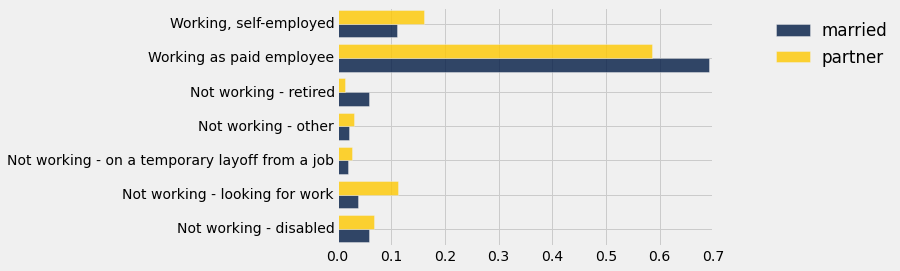

In [16]:
employed.select(['empl_status', 'married', 'partner']).barh('empl_status', overlay=True)

The difference in the two bar graphs raises the question of whether the differences are due to randomness in the sampling, or whether the distribution of employment status is indeed different for married men in the U.S. than it is for unmarried men who live with their partners. Remember that the data that we have are from a sample of just 1,034 couples; we do not know the distribution of employment status of men in the entire country.

We can answer the question by performing a statistical test of hypotheses. Let us use the terminolgoy that we developed for this in the previous section.

**Null hypothesis.** In the United States, the distribution of employment status among married men is the same as among unmarried men who live with their partners. The difference between the two samples is due to chance.

**Alternative hypothesis.** In the United States, the distributions of the employment status of the two groups of men are different.

As our **test statistic**, we will use the total variation distance between the two distributions. Because employment status is a categorical variable, there is no question of computing summary statistics such as means. By using the total variation distance, we can compare the entire distributions, not just summaries. 

The observed value of the test statistic is about 0.15:

In [17]:
# TVD between the two distributions

observed_tvd = 0.5*sum(abs(employed['married']-employed['partner']))
observed_tvd

0.15135878595428867

### The Null Hypotheis and Random Permutations

The next step is important but subtle. In order to compare this observed value of the total variation distance with what is predicted by the null hypothesis, we need the probability distribution of the total variation distance under the null hypothesis. But  the probability distribution of the total variation distance is quite daunting to derive by mathematics. So we will simulate numerous repetitions of the sampling procedure under the null hypothesis. 

With just one sample at hand, and no further knowledge of the distribution of employment status among women in the U.S., how can we go about replicating the sampling procedure? The key is to note that *if* marital status and employment status were not connected in any way, then we could replicate the sampling process by replacing each oman's employment status by a randomly picked employment status from among all the men, married or unmarried. Doing this for all the men is equivalent to permuting the entire column containing employment status, while leaving the marital status column unchanged.

Thus, under the null hypothesis, we can replicate the sampling process by assigning to each married man an employment status chosen at random without replacement from the entries in `empl_status`. Since the first 742 rows of `males` correspond to the married men, we can do the replication by simply permuting the entire `empl_status` column and leaving everything else unchanged.

Let's implement this plan. First, we will shuffle the column `empl_status` using the `sample` method, which just shuffles all rows when provided with no arguments.

In [18]:
# Randomly permute the employment status of all men

shuffled = males.select('empl_status').sample()
shuffled

empl_status
Working as paid employee
Working as paid employee
Working as paid employee
Working as paid employee
Working as paid employee
Working as paid employee
Working as paid employee
Working as paid employee
Working as paid employee
Working as paid employee


The first two columns of the table below are taken from the original sample. The third has been created by randomly permuting the original `empl_status` column. 

In [19]:
# Construct a table in which employment status has been shuffled

males_with_shuffled_empl = Table([males['mar_status'], males['empl_status'], shuffled['empl_status']], 
                                 ['mar_status',        'empl_status',        'empl_status_shuffled'])
males_with_shuffled_empl['count'] = 1
males_with_shuffled_empl

mar_status,empl_status,empl_status_shuffled,count
married,Working as paid employee,Working as paid employee,1
married,Working as paid employee,Working as paid employee,1
married,Working as paid employee,Working as paid employee,1
married,"Working, self-employed",Working as paid employee,1
married,Not working - other,Working as paid employee,1
married,Not working - on a temporary layoff from a job,Working as paid employee,1
married,Not working - disabled,Working as paid employee,1
married,Working as paid employee,Working as paid employee,1
married,Working as paid employee,Working as paid employee,1
married,Not working - retired,Working as paid employee,1


Once again, the ``pivot`` method computes the contingency table, which allows us to calculate the total variation distance between the distributions of the two groups of men.

In [20]:
employed_shuffled = males_with_shuffled_empl.pivot('mar_status', 'empl_status', 'count', sum)
employed_shuffled

empl_status,married count,partner count
Not working - disabled,44,20
Not working - looking for work,28,33
Not working - on a temporary layoff from a job,15,8
Not working - other,16,9
Not working - retired,44,4
Working as paid employee,513,171
"Working, self-employed",82,47


In [21]:
# TVD between the two distributions of the permuted table
married = employed_shuffled['married count']
partner = employed_shuffled['partner count']
0.5*sum(abs(married/sum(married)-partner/sum(partner)))

0.15135878595428867

This total variation distance was computed based on the null hypothesis that the distributions of employment status for the two groups of men are the same. You can see that it is noticeably smaller than the observed value of the total variation distance (0.15) between the two groups in our original sample. 

### A Permutation Test

Could that just be due to chance variation? We will only know if we run many more replications, by randomly permuting the ``empl_status`` column repeatedly. This method of testing is known as a **permutation test**.

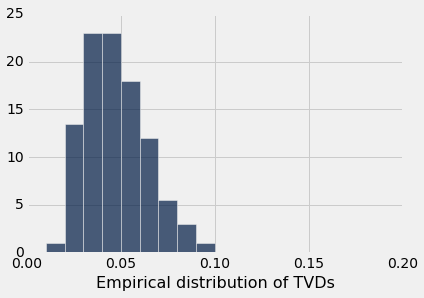

In [22]:
# Put it all together in a for loop to perform a permutation test

repetitions=200

tvds = []

for i in np.arange(repetitions):
    # Construct a permuted table
    shuffled = males.select('empl_status').sample()
    combined = Table([males['mar_status'], shuffled['empl_status']], 
                     ['mar_status',        'empl_status'])
    combined['count'] = 1
    employed_shuffled = combined.pivot('mar_status', 'empl_status', 'count', sum)
    
    # Compute TVD
    married = employed_shuffled['married count']
    partner = employed_shuffled['partner count']
    tvd = 0.5*sum(abs(married/sum(married)-partner/sum(partner)))
    tvds.append(tvd)

Table([tvds], ['Empirical distribution of TVDs']).hist(bins=np.arange(0, 0.2, 0.01),normed=True)

The figure above is the **empirical distribution of the total variation distance** between the distributions of the employment status of married and unmarried men, under the null hypothesis. **The observed test statistic of 0.15 is quite far in the tail, and so the chance of observing such an extreme value under the null hypothesis is close to 0**. 

This chance is called a "P-value" in a hypothesis test. The P-value is the chance that our test statistic (TVD) would come out at least as extreme as the observed value (0.15 or greater) under the null hypothesis.



We can directly compute an empirical approximation to the P-value using the `tvds` we collected during the permutation test. The `np.count_nonzero` function takes a sequence of numbers and returns how many of them are not zero. When passed a list of `True` and `False` values, it returns the number that are `True`. 

In [23]:
p_value = np.count_nonzero(tvds >= observed_tvd) / len(tvds)
p_value

0.0

We call this `p_value` an empirical approximation because it is not the true chance of observing a TVD at least as large as 0.15. Instead, it is the particular result we happened to compute when shuffling randomly 200 times. Computing the true value would require us to consider all possible outcomes of shuffling (which is large) instead of just 200 random shuffles. Were we to consider all cases, there would be some with a more extreme TVD, and so the true P-value is greater than zero but not by much.

A low P-value constitutes **evidence in favor of the alternative hypothesis**. The data support the hypothesis that in the United States, the distribution of the employment status of married men is not the same as that of unmarried men who live with their partners.

In this example, our empirical estimate from sampling tells us all the information we need to draw conclusions from the data; the observed statistic is very unlikely under the null hypothesis. Precisely how unlikely often doesn't matter. Permutation tests of this form are indeed quite common in practice because they make few assumptions about the underlying population and are straightforward to perform and interpret.

### Generalizing Our Hypothesis Test

The example above includes a substantial amount of code in order to investigate the relationship between two characteristics (marital status and employment status) for a particular subset of the surveyed population (males). Suppose we would like to investigate different characteristics or a different population. How can we reuse the code we have written so far in order to explore more relationships?

Functions allow us to generalize both the statistics we compute and the computational process of performing a permutation test. We can begin with a generalized computation of total variation distance between the distribution of any column of values (such as employment status) when separated into any two conditions (such as marital status) for a collection of data described by any table. Our implementation includes the same statements as we used above, but uses generic names that are specified by the final function call.

In [24]:
# TVD between any two conditions

def tvd(t, conditions, values):
    """Compute the total variation distance between counts of values under two conditions.
    
    t          (Table) -- a table
    conditions (str)   -- a column label in t
    values     (str)   -- a column label in t
    """
    t['count'] = 1
    e = t.pivot(conditions, values, 'count', sum)
    a = e.columns[1]
    b = e.columns[2]
    return 0.5*sum(abs(a/sum(a) - b/sum(b)))

tvd(males, 'mar_status', 'empl_status')

0.15135878595428867

Next, we can write a function that performs a permutation test using this `tvd` function to compute the same statistic on shuffled variants of any table. It's worth reading through this implementation to understand its details. 

In [31]:
def permutation_tvd(original, conditions, values):
    """Perform a permutation test to estimate the likelihood of the observed
    total variation distance (our test statistic) between counts of values
    under the null hypothesis that the distribution of values for two 
    conditions is the same.
    """
    repetitions=200
    stats = []

    for i in np.arange(repetitions):
        shuffled = original.sample()
        combined = Table([original[conditions], shuffled[values]], 
                         [conditions, values])
        stats.append(tvd(combined, conditions, values))

    observation = tvd(original, conditions, values)
    p_value = np.count_nonzero(stats >= observation) / repetitions
    
    print("Observation:", observation)
    print("Empirical P-value:", p_value)
    Table([stats], ['Empirical distribution']).hist(normed=True)

Observation: 0.151358785954
Empirical P-value: 0.0


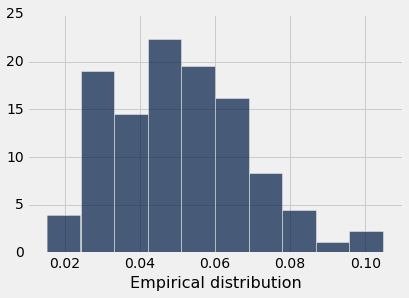

In [32]:
permutation_tvd(males, 'mar_status', 'empl_status')

Now that we have generalized our permutation test, we can apply it to other hypotheses. For example, we can compare the distribution over the employment status of women, grouping them by their marital status. In the case of men we found a difference, but what about with women? First, we can visualize the two distributions. 

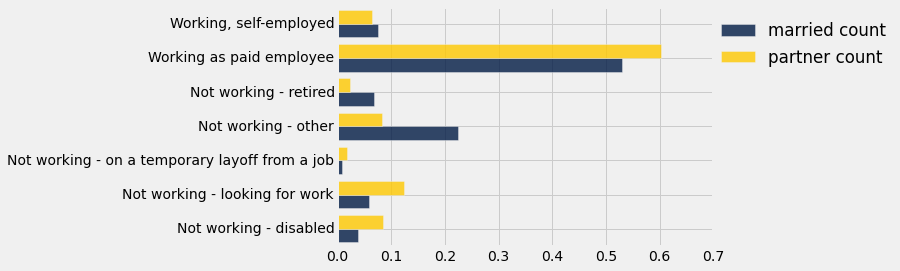

In [31]:
def compare_bar(t, conditions, values):
    """Overlay histograms of values for two conditions."""
    t['count'] = 1
    e = t.pivot(conditions, values, 'count', sum)
    for label in e.column_labels[1:]:
        e[label] = e[label]/sum(e[label]) # Normalize each column of counts
    e.barh(values, overlay=True)

compare_bar(couples.where('gender', 'female'), 'mar_status', 'empl_status')

A glance at the two columns of proportions shows that the two distributions are different. The difference in the category "Not working – other" is particularly striking: about 22% of the married women are in this cateogory, compared to only about 8% of the unmarried women. There are several reasons for this difference. For example, the percent of homemakers is greater among married women than among unmarried women, possibly because married women are more likely to be "stay-at-home" mothers of young children. The difference could also be generational: as we saw earlier, the married couples are older than the unmarried partners, and older women are less likely to be in the workforce than younger women.

Let's review our reasoning about hypothesis testing. We have to consider the possibility that the difference could simply be the result of chance variation. Remember that our data are only from a random sample of couples. We do not have data for all the couples in the United States. 

To test this, we set up null and alternative hypotheses. When setting up a hypothesis, the null in particular, it is important to be clear: exactly what are the unknowns about which you hypothesizing? In our example, the sample is entirely known, and the distributions of employment status in the two groups of women are simply different – the difference is visible in the data. The unknowns are the distributions of employment status among married and unmarried women *in the United States*, the population from which the sample was drawn. It is those distributions, in the population, about which we will form the competing hypotheses.

**Null hypothesis**: In the U.S., the distribution of employment status is the same for married women as for unmarried women living with their partners. The difference in the sample is due to chance.

**Alternative hypothesis**: In the U.S., the distributions of employment status among married and unmarried cohabitating women are different.

As with the males, the null hypothesis can be rejected because if it were true, something very unlikely occurred in this sample.

Observation: 0.195343942695
Empirical P-value: 0.0


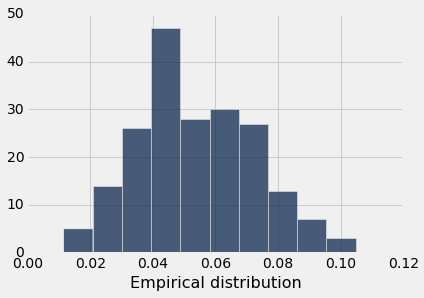

In [32]:
permutation_tvd(couples.where('gender', 'female'), 'mar_status', 'empl_status')

### Age: A Quantitative Variable

Next, we can test the null hypothesis that the distributions in ages between married and cohabitating individuals are the same. Age is a quantitative variable — everyone has a different age. However, in our dataset, ages have been binned already into yearly categories.

It is perhaps no surprise that the empirical P-value is 0 (below); the idea that a couple would live together without being married has become more acceptable over time, and so we might expect that cohabitating couples are younger.

Observation: 0.300760624746
Empirical P-value: 0.0


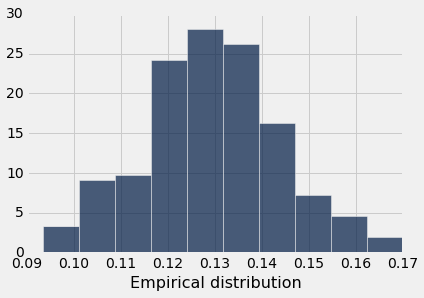

In [33]:
permutation_tvd(couples, 'mar_status', 'age')

Looking at the distributions in ages confirms the result of this permutation test; the distributions simply look quite different. Here's a function that compares the distribution of values for two conditions. When called on `'mar_status'` as the `conditions`, we compare the distributions of ages for `mar_status=1` (married) and `mar_status=2` (cohabitating). 

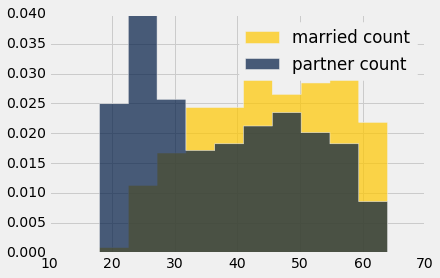

In [29]:
def compare(t, conditions, values):
    """Overlay histograms of values for two conditions."""
    t['count'] = 1
    e = t.pivot(conditions, values, 'count', sum)
    for label in e.column_labels[1:]:
        e[label] = e[label]/sum(e[label]) # Normalize each column of counts
    e.hist(counts=values, normed=True, overlay=True)

compare(couples, 'mar_status', 'age')

What about the relationship of gender and age? Is there a difference in these distributions?

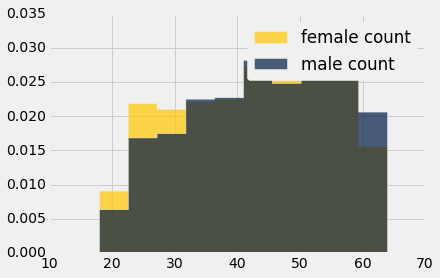

In [30]:
compare(couples, 'gender', 'age')

In this case, the women (gender=2) in the surveyed population of couples have an age distribution that skews a bit younger. Would this observed difference be a typical result of sampling if both the distributions of men and women in couples were in fact the same? According to our `permutation_tvd` test, the total variation distance between ages of these two groups is quite typical.

Observation: 0.115087040619
Empirical P-value: 0.545


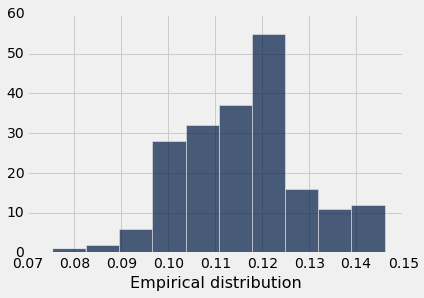

In [30]:
permutation_tvd(couples, 'gender', 'age')